In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/train_aug_resize.zip -d /content/

流式输出内容被截断，只能显示最后 5000 行内容。
  inflating: /content/train_aug_resize/S-1908-000892_PAS_1of2_647582a4435c92704a441257_3.png  
  inflating: /content/train_aug_resize/S-1908-000892_PAS_1of2_647582a4435c92704a441259.png  
  inflating: /content/train_aug_resize/S-1908-000892_PAS_1of2_647582a4435c92704a441259_1.png  
  inflating: /content/train_aug_resize/S-1908-000892_PAS_1of2_647582a4435c92704a441259_2.png  
  inflating: /content/train_aug_resize/S-1908-000892_PAS_1of2_647582a4435c92704a441259_3.png  
  inflating: /content/train_aug_resize/S-1908-000892_PAS_1of2_647582a4435c92704a44125a.png  
  inflating: /content/train_aug_resize/S-1908-000892_PAS_1of2_647582a4435c92704a44125a_1.png  
  inflating: /content/train_aug_resize/S-1908-000892_PAS_1of2_647582a4435c92704a44125a_2.png  
  inflating: /content/train_aug_resize/S-1908-000892_PAS_1of2_647582a4435c92704a44125a_3.png  
  inflating: /content/train_aug_resize/S-1908-000892_PAS_1of2_647582a4435c92704a44125b.png  
  inflating: /content/train_a

In [ ]:
!unzip /content/drive/MyDrive/val_resize.zip -d /content/

Archive:  /content/drive/MyDrive/val_resize.zip
   creating: /content/val_resize/
  inflating: /content/val_resize/18-142_PAS_1of6_647e17ac435c92704a564fe8.png  
  inflating: /content/val_resize/18-142_PAS_2of6_64551bbb435c92704a39934f.png  
  inflating: /content/val_resize/18-142_PAS_2of6_64551bbb435c92704a399351.png  
  inflating: /content/val_resize/18-142_PAS_2of6_64551bbb435c92704a39935a.png  
  inflating: /content/val_resize/18-142_PAS_2of6_64551bbb435c92704a399362.png  
  inflating: /content/val_resize/18-142_PAS_2of6_64551bbb435c92704a39937e.png  
  inflating: /content/val_resize/18-142_PAS_2of6_64551bbb435c92704a399384.png  
  inflating: /content/val_resize/18-142_PAS_2of6_64551bbb435c92704a399388.png  
  inflating: /content/val_resize/18-142_PAS_2of6_64551bbb435c92704a39938d.png  
  inflating: /content/val_resize/18-142_PAS_2of6_64551bbb435c92704a39938e.png  
  inflating: /content/val_resize/18-142_PAS_3of6_64551bc4435c92704a39b4a6.png  
  inflating: /content/val_resize/18-14

In [ ]:
!unzip /content/drive/MyDrive/test_resize.zip -d /content/

Archive:  /content/drive/MyDrive/test_resize.zip
   creating: /content/test_resize/
  inflating: /content/test_resize/18-142_PAS_1of6_647e17ac435c92704a564fee.png  
  inflating: /content/test_resize/18-142_PAS_1of6_647e17ac435c92704a564ffb.png  
  inflating: /content/test_resize/18-142_PAS_1of6_647e17ac435c92704a565001.png  
  inflating: /content/test_resize/18-142_PAS_2of6_64551bbb435c92704a399336.png  
  inflating: /content/test_resize/18-142_PAS_2of6_64551bbb435c92704a399337.png  
  inflating: /content/test_resize/18-142_PAS_2of6_64551bbb435c92704a39933a.png  
  inflating: /content/test_resize/18-142_PAS_2of6_64551bbb435c92704a399363.png  
  inflating: /content/test_resize/18-142_PAS_2of6_64551bbb435c92704a39936b.png  
  inflating: /content/test_resize/18-142_PAS_2of6_64551bbb435c92704a39936d.png  
  inflating: /content/test_resize/18-142_PAS_2of6_64551bbb435c92704a39936f.png  
  inflating: /content/test_resize/18-142_PAS_2of6_64551bbb435c92704a399375.png  
  inflating: /content/tes

In [ ]:
pip show torchvision

Name: torchvision
Version: 0.19.1+cu121
Summary: image and video datasets and models for torch deep learning
Home-page: https://github.com/pytorch/vision
Author: PyTorch Core Team
Author-email: soumith@pytorch.org
License: BSD
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, pillow, torch
Required-by: fastai


In [ ]:
pip install torchvision --upgrade

In [ ]:
import torch
from torch.utils.data import Dataset, DataLoader
from torchvision import transforms
from PIL import Image
import os
import pandas as pd
import torch
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim
from torch.optim import Adam
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_fscore_support, confusion_matrix
from torchvision.models import resnet152, ResNet152_Weights
import torch.nn.functional as F


In [ ]:
class ImageDataset(Dataset):
    def __init__(self, img_folder, csv_file, transform=None):
        self.img_folder = img_folder
        self.df = pd.read_csv(csv_file)
        self.transform = transform


        self.image_labels = {self.get_original_name(row['name']): row['ground truth'] for _, row in self.df.iterrows()}

    def __len__(self):
        return len(os.listdir(self.img_folder))

    def __getitem__(self, idx):
        img_name = os.listdir(self.img_folder)[idx]
        img_path = os.path.join(self.img_folder, img_name)


        original_name = self.get_original_name(img_name)


        image = Image.open(img_path)

        if self.transform:
            image = self.transform(image)


        if original_name in self.image_labels:
            label = self.image_labels[original_name]
        else:

            raise ValueError(f"Label for image {original_name} not found in CSV file.")

        return image, label

    def get_original_name(self, filename):
        # Check if the filename ends with _1, _2, or _3, and remove it if present
        if filename.endswith('_1.png') or filename.endswith('_2.png') or filename.endswith('_3.png'):
            original_name = filename.rsplit('_', 1)[0] + '.png'
        else:
            original_name = filename
        return original_name


In [ ]:

img_folder = 'train_aug_resize'
csv_file = '/content/public.csv'


dataset = ImageDataset(img_folder=img_folder, csv_file=csv_file)


import random
for i in range(30):
    idx = random.randint(0, len(dataset) - 1)
    try:
        img_name = os.listdir(img_folder)[idx]
        image, label = dataset[idx]
        print(f"Image Name: {img_name}, Label: {label}")
    except ValueError as e:
        print(e)

Image Name: S-2006-002139_PAS_1of2_64543297435c92704a384905.png, Label: 0
Image Name: S-2006-001801_PAS_2of2_64542f45435c92704a354bba.png, Label: 0
Image Name: S-1908-010019_PAS_1of2_64551d01435c92704a3c70c6.png, Label: 1
Image Name: S-2001-005356_PAS_2of2_64542e76435c92704a33f717_1.png, Label: 1
Image Name: S-2002-005612_PAS_1of2_64542eb0435c92704a344e30.png, Label: 1
Image Name: S-2010-013043_PAS_1of2_64552795435c92704a3e03b4_1.png, Label: 1
Image Name: 18-162_PAS_1of6_64551bec435c92704a3a2135.png, Label: 0
Image Name: S-2006-002084_PAS_1of3_64543021435c92704a35b4bd.png, Label: 0
Image Name: S-2010-013043_PAS_1of2_64552795435c92704a3e03c5.png, Label: 1
Image Name: 18-162_PAS_1of6_64551bec435c92704a3a2123.png, Label: 0
Image Name: S-1908-009781_PAS_2of2_64551ce6435c92704a3c5152.png, Label: 0
Image Name: S-2002-007507_PAS_2of2_64542ede435c92704a34a9c9.png, Label: 0
Image Name: S-2105-008096_PAS_2of2_645528a9435c92704a406dbc_1.png, Label: 1
Image Name: S-2102-006457_PAS_2of2_645527ff435

In [ ]:
transform = transforms.Compose([
    transforms.ToTensor()
])


train_dataset = ImageDataset(img_folder='train_aug_resize', csv_file='/content/public.csv', transform=transform)


train_loader = DataLoader(train_dataset, batch_size=32, shuffle=False)

val_dataset = ImageDataset(img_folder='val_resize', csv_file='/content/public.csv', transform=transform)


val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

test_dataset = ImageDataset(img_folder='test_resize', csv_file='/content/public.csv', transform=transform)


test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)



In [ ]:

class EarlyStopping:
    def __init__(self, patience=5, min_delta=0):
        self.patience = patience
        self.min_delta = min_delta
        self.counter = 0
        self.best_loss = None
        self.early_stop = False

    def __call__(self, val_loss):
        if self.best_loss is None:
            self.best_loss = val_loss
        elif val_loss > self.best_loss - self.min_delta:
            self.counter += 1
            if self.counter >= self.patience:
                self.early_stop = True
        else:
            self.best_loss = val_loss
            self.counter = 0

# **ViT Model 1**

In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model = models.vit_b_16(pretrained=True)


num_ftrs = model.heads.head.in_features
model.heads.head = nn.Linear(num_ftrs, 2)


model = model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
early_stopping = EarlyStopping(patience=15, min_delta=0.001)

In [ ]:
num_epochs = 300
train_losses = []
val_losses = []
val_aucs = []

for epoch in range(num_epochs):
  model.train()
  running_loss = 0.0
  for images, labels in train_loader:
    images = images.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item() * images.size(0)


  epoch_train_loss = running_loss / len(train_loader.dataset)
  train_losses.append(epoch_train_loss)

  model.eval()
  all_labels = []
  all_preds = []
  val_running_loss = 0.0
  with torch.no_grad():
      for val_images, val_labels in val_loader:
        val_images = val_images.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model(val_images)
        val_loss = criterion(val_outputs, val_labels)
        val_running_loss += val_loss.item() * val_images.size(0)
        preds = torch.softmax(val_outputs, dim=1)[:, 1].cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(val_labels.cpu().numpy())

  epoch_val_loss = val_running_loss / len(val_loader.dataset)
  val_losses.append(epoch_val_loss)
  val_auc = roc_auc_score(all_labels, all_preds)
  val_aucs.append(val_auc)
  print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}, Val AUC: {val_auc:.4f}")

  early_stopping(val_auc)
  if early_stopping.early_stop:
    print("Early stopping triggered.")
    break

Epoch [1/300], Train Loss: 0.1417, Val Loss: 0.0272, Val AUC: 0.9998
Epoch [2/300], Train Loss: 0.0400, Val Loss: 0.0223, Val AUC: 0.9997
Epoch [3/300], Train Loss: 0.0295, Val Loss: 0.0218, Val AUC: 0.9999
Epoch [4/300], Train Loss: 0.0204, Val Loss: 0.0242, Val AUC: 0.9999
Epoch [5/300], Train Loss: 0.0168, Val Loss: 0.0153, Val AUC: 0.9997
Epoch [6/300], Train Loss: 0.0096, Val Loss: 0.0373, Val AUC: 0.9999
Epoch [7/300], Train Loss: 0.0410, Val Loss: 0.0351, Val AUC: 0.9996
Epoch [8/300], Train Loss: 0.0132, Val Loss: 0.0298, Val AUC: 0.9996
Epoch [9/300], Train Loss: 0.0147, Val Loss: 0.0744, Val AUC: 0.9996
Epoch [10/300], Train Loss: 0.0095, Val Loss: 0.0815, Val AUC: 0.9989
Epoch [11/300], Train Loss: 0.0102, Val Loss: 0.0319, Val AUC: 0.9996
Epoch [12/300], Train Loss: 0.0044, Val Loss: 0.0197, Val AUC: 0.9997
Epoch [13/300], Train Loss: 0.0211, Val Loss: 0.0475, Val AUC: 0.9990
Epoch [14/300], Train Loss: 0.0093, Val Loss: 0.1096, Val AUC: 0.9981
Epoch [15/300], Train Loss: 0

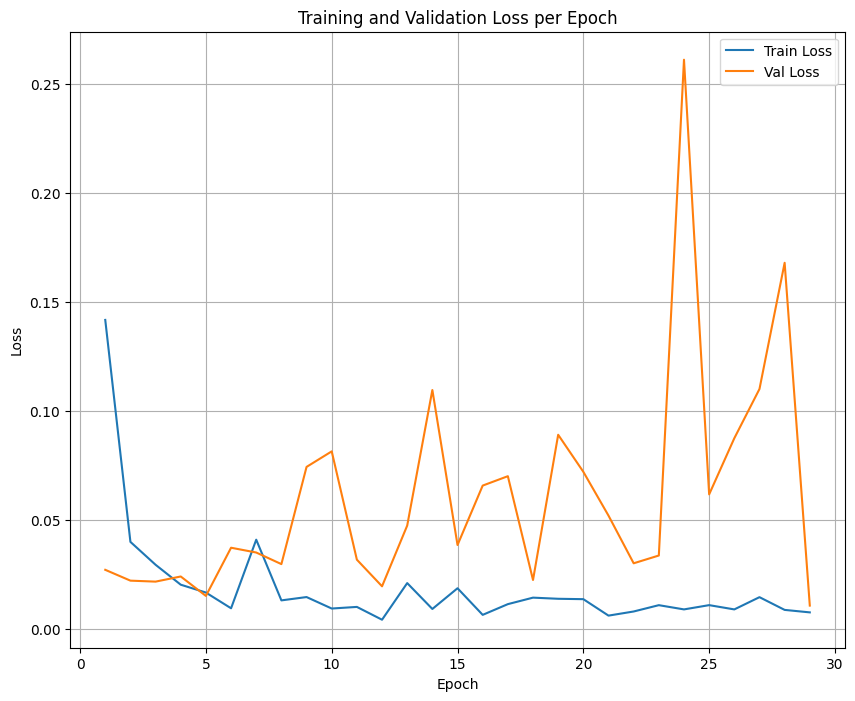

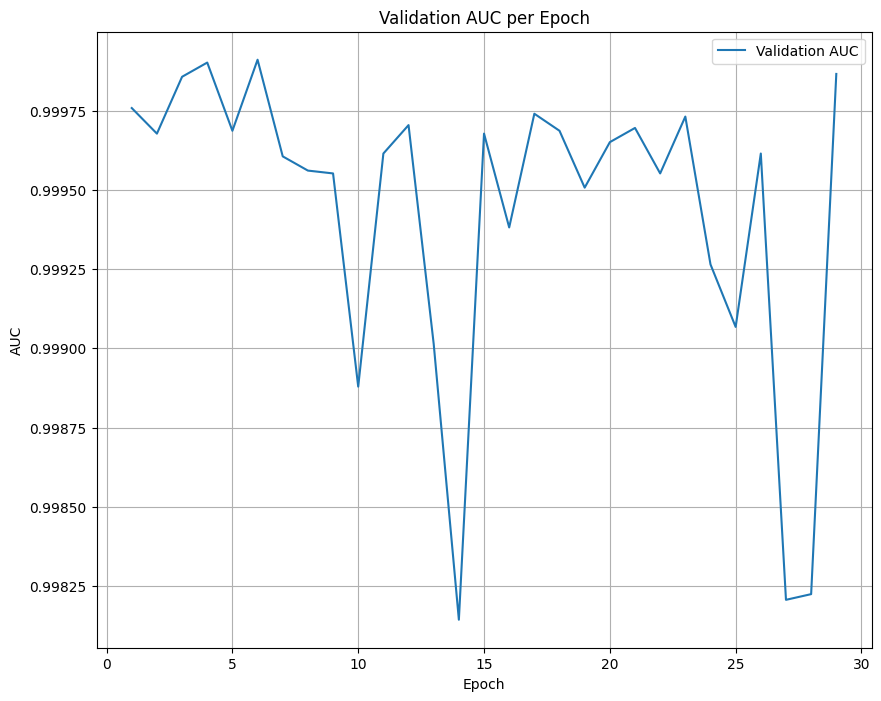

In [ ]:

plt.figure(figsize=(10, 8))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss")
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Val Loss")
plt.title("Training and Validation Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(10, 8))
plt.plot(range(1, len(val_aucs) + 1), val_aucs, label="Validation AUC")
plt.title("Validation AUC per Epoch")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()
plt.grid()
plt.show()

In [ ]:

test_running_loss = 0.0
all_labels = []
all_probs = []


model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)
        test_running_loss += loss.item() * images.size(0)


        probs = torch.sigmoid(outputs).cpu().numpy()
        all_probs.extend(probs)
        all_labels.extend(labels.cpu().numpy())


test_loss = test_running_loss / len(test_loader.dataset)


all_probs_np = np.array(all_probs)
test_auc = roc_auc_score(all_labels, all_probs_np[:, 1])


predicted_labels = np.argmax(all_probs_np, axis=1)
precision, recall, f1_score, _ = precision_recall_fscore_support(all_labels, predicted_labels, average='binary')
cm = confusion_matrix(all_labels, predicted_labels)


print(f'Test Loss: {test_loss:.4f}')
print(f'Test AUC: {test_auc:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')
print(f'Confusion Matrix: {cm}')

Test Loss: 0.0949
Test AUC: 0.9958
Precision: 0.9379
Recall: 0.9497
F1 Score: 0.9437
Confusion Matrix: [[696  10]
 [  8 151]]


The performance comparison between the untuned Vision Transformer (ViT) and ResNet152 is quite striking, with ViT showing stronger results across several key metrics, especially in handling imbalanced data. Let’s break down the differences step by step:


1.  Test Loss
*   ResNet152：0.3396
*   ViT：0.0949


*   ViT's test loss is significantly lower than ResNet152, indicating that ViT fits the data better overall and has less error on the test set, even without parameter tuning.


2.  AUC (Area Under the Curve)

*   ResNet152：0.9908
*   ViT：0.9958


*   Although both models have AUC scores close to 1.0, indicating strong discrimination ability, ViT's slightly higher AUC suggests a better overall distinction between positive and negative samples.

3. Precision

*   ResNet152：0.9700
*   ViT：0.9379


*   ResNet152 has a slightly higher precision than ViT, meaning it correctly identified more positive samples. However, recall should also be examined to fully understand the model's performance.

4. Recall

*   ResNet152：0.6101
*   ViT：0.9497


*   The difference in recall is striking. ResNet152 only identified about 61% of the positive samples, while ViT detected 95%. This suggests that ViT is far better at finding all the positive samples, which is crucial for imbalanced datasets. Missing positive samples reduces the model’s practical utility.

5. F1 Score

*   ResNet152：0.7490
*   ViT：0.9437



*   The F1 score balances precision and recall. ViT’s F1 score is significantly higher, reflecting better overall performance between precision and recall. ViT’s results are more stable, whereas ResNet152 suffers from lower recall, dragging down its F1 score.


6. Confusion Matrix

*   ResNet152：
         [[703, 3],
         [62, 97]]
*   ViT：
         [[696, 10],
         [8, 151]]


*   From the confusion matrix, we see that ViT only has 8 false negatives (FN), compared to ResNet152's 62. This shows ViT excels at not missing positive samples. Additionally, ViT has relatively fewer false positives (FP), indicating its effectiveness in distinguishing between positive and negative cases.

Even without parameter tuning, ViT demonstrates a clear advantage from the start. While ResNet152 has slightly higher precision, ViT's recall far exceeds that of ResNet152, showing its strength in handling imbalanced data. ViT’s self-attention mechanism likely allows it to capture global image features more effectively, resulting in more accurate and stable classification.

Comparison Between Optimally Tuned ResNet152 and Untuned ViT


1.   Test Loss
*   Optimal ResNet152: 0.0954
*   ViT：0.0949


2.   AUC (Area Under the Curve)
*   Optimal ResNet152: 0.9972
*   ViT：0.9958

3.   Precision
*   Optimal ResNet152: 0.9398
*   ViT：0.9379

4.   Recall
*   Optimal ResNet152: 0.9811
*   ViT：0.9497

5.  F1 Score
*   Optimal ResNet152: 0.9600
*   ViT：0.9437

6. Confusion Matrix
*   Optimal ResNet152:
        [[696, 10],
        [3, 156]]
*   ViT：
        [[696, 10],
        [8, 151]]







It’s clear that, even without any tuning, ViT’s initial performance across various metrics is quite close to the best-tuned ResNet152. Although ResNet152 slightly outperforms ViT in most metrics, the gap is minimal. Next, we’ll explore whether tuning ViT can further improve its performance.

My primary goal is to enhance the model's performance on the imbalanced dataset and improve the recognition of minority classes.

First, I will try adjusting class weights. This method directly impacts the model's learning process by increasing the weight of the minority class, helping the model better identify those samples.

After that, I’ll focus on F1 score optimization. By reducing the loss importance of already correctly classified samples, the model can concentrate more on those difficult-to-classify examples. This will be particularly effective in improving overall precision and recall, especially for positive class predictions.

# **ViT Model 2**
To avoid continuing with the results from the previous ResNet152 Model 4, the session needs to be restarted, and the execution should begin again from the data loading step.

In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model = models.vit_b_16(pretrained=True)


num_ftrs = model.heads.head.in_features
model.heads.head = nn.Linear(num_ftrs, 2)


model = model.to(device)


class_weights = torch.tensor([1.0, 1.3]).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

optimizer = optim.Adam(model.parameters(), lr=0.0001)
early_stopping = EarlyStopping(patience=15, min_delta=0.001)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:01<00:00, 206MB/s]


In [ ]:
num_epochs = 300
train_losses = []
val_losses = []
val_aucs = []

for epoch in range(num_epochs):
  model.train()
  running_loss = 0.0
  for images, labels in train_loader:
    images = images.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item() * images.size(0)


  epoch_train_loss = running_loss / len(train_loader.dataset)
  train_losses.append(epoch_train_loss)

  model.eval()
  all_labels = []
  all_preds = []
  val_running_loss = 0.0
  with torch.no_grad():
      for val_images, val_labels in val_loader:
        val_images = val_images.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model(val_images)
        val_loss = criterion(val_outputs, val_labels)
        val_running_loss += val_loss.item() * val_images.size(0)
        preds = torch.softmax(val_outputs, dim=1)[:, 1].cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(val_labels.cpu().numpy())

  epoch_val_loss = val_running_loss / len(val_loader.dataset)
  val_losses.append(epoch_val_loss)
  val_auc = roc_auc_score(all_labels, all_preds)
  val_aucs.append(val_auc)
  print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}, Val AUC: {val_auc:.4f}")

  early_stopping(val_auc)
  if early_stopping.early_stop:
    print("Early stopping triggered.")
    break

Epoch [1/300], Train Loss: 0.1468, Val Loss: 0.0275, Val AUC: 0.9995
Epoch [2/300], Train Loss: 0.0450, Val Loss: 0.1855, Val AUC: 0.9992
Epoch [3/300], Train Loss: 0.0306, Val Loss: 0.0627, Val AUC: 0.9993
Epoch [4/300], Train Loss: 0.0227, Val Loss: 0.0696, Val AUC: 0.9994
Epoch [5/300], Train Loss: 0.0205, Val Loss: 0.0244, Val AUC: 0.9999
Epoch [6/300], Train Loss: 0.0064, Val Loss: 0.0620, Val AUC: 0.9998
Epoch [7/300], Train Loss: 0.0254, Val Loss: 0.0518, Val AUC: 0.9998
Epoch [8/300], Train Loss: 0.0195, Val Loss: 0.0604, Val AUC: 0.9992
Epoch [9/300], Train Loss: 0.0172, Val Loss: 0.0740, Val AUC: 0.9980
Epoch [10/300], Train Loss: 0.0003, Val Loss: 0.0504, Val AUC: 0.9989
Epoch [11/300], Train Loss: 0.0000, Val Loss: 0.0490, Val AUC: 0.9989
Epoch [12/300], Train Loss: 0.0000, Val Loss: 0.0496, Val AUC: 0.9989
Epoch [13/300], Train Loss: 0.0000, Val Loss: 0.0502, Val AUC: 0.9989
Epoch [14/300], Train Loss: 0.0000, Val Loss: 0.0509, Val AUC: 0.9989
Epoch [15/300], Train Loss: 0

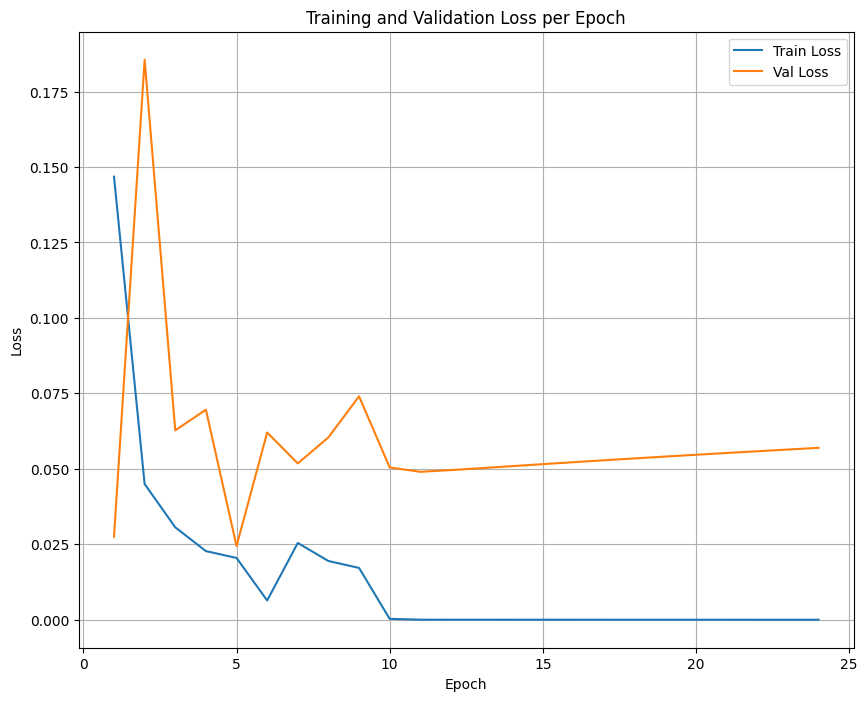

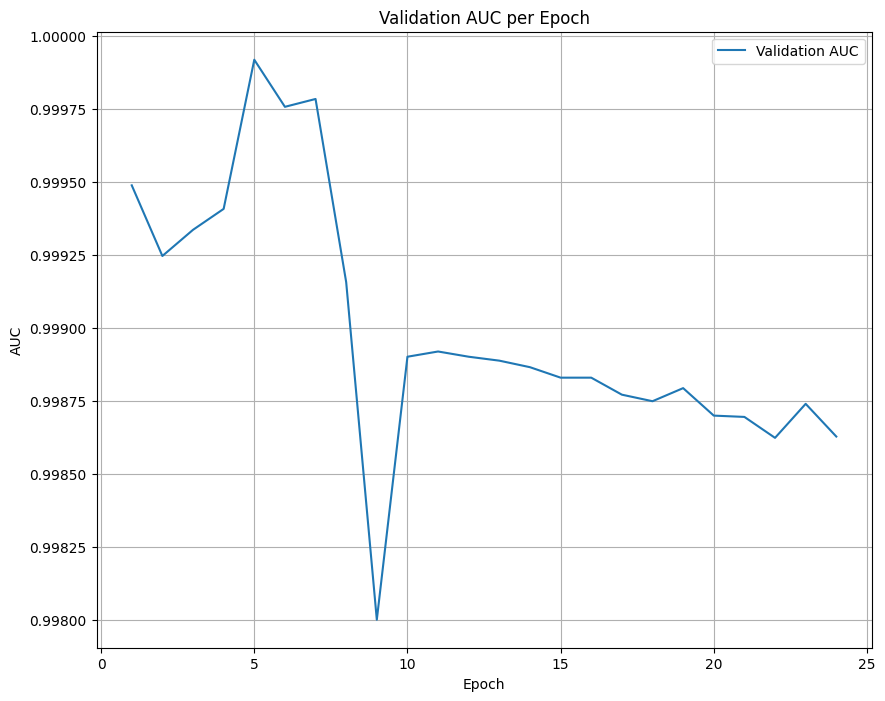

In [ ]:

plt.figure(figsize=(10, 8))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss")
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Val Loss")
plt.title("Training and Validation Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(10, 8))
plt.plot(range(1, len(val_aucs) + 1), val_aucs, label="Validation AUC")
plt.title("Validation AUC per Epoch")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()
plt.grid()
plt.show()

In [ ]:

test_running_loss = 0.0
all_labels = []
all_probs = []


model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)
        test_running_loss += loss.item() * images.size(0)


        probs = torch.sigmoid(outputs).cpu().numpy()
        all_probs.extend(probs)
        all_labels.extend(labels.cpu().numpy())


test_loss = test_running_loss / len(test_loader.dataset)


all_probs_np = np.array(all_probs)
test_auc = roc_auc_score(all_labels, all_probs_np[:, 1])


predicted_labels = np.argmax(all_probs_np, axis=1)
precision, recall, f1_score, _ = precision_recall_fscore_support(all_labels, predicted_labels, average='binary')
cm = confusion_matrix(all_labels, predicted_labels)


print(f'Test Loss: {test_loss:.4f}')
print(f'Test AUC: {test_auc:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')
print(f'Confusion Matrix: {cm}')

Test Loss: 0.1390
Test AUC: 0.9977
Precision: 0.9286
Recall: 0.9811
F1 Score: 0.9541
Confusion Matrix: [[694  12]
 [  3 156]]


After adjusting the class weights, the recall improved significantly from 0.9497 to 0.9811, indicating a notable reduction in missed positive cases. However, precision slightly decreased (from 0.9379 to 0.9286), suggesting an increase in false positives. The improved F1 score also shows a better balance between precision and recall.

Given the medical context, reducing missed positives (i.e., improving recall) is the primary goal, so the current weight adjustment can be considered a success. However, two strategies can be considered moving forward:


1.   Continue fine-tuning the weights, trying values around 1.3, such as 1.2, 1.4, and 1.5, to see if we can further reduce missed positives. But this may increase false positives, affecting precision. It’s essential to carefully balance and find the optimal trade-off between recall and precision.
2.   After testing different weights, I plan to explore Focal Loss as the next step.

# **ViT Model 3**
To avoid continuing with the results from the previous ResNet152 Model 4, the session needs to be restarted, and the execution should begin again from the data loading step.

In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model = models.vit_b_16(pretrained=True)


num_ftrs = model.heads.head.in_features
model.heads.head = nn.Linear(num_ftrs, 2)

model = model.to(device)


class_weights = torch.tensor([1.0, 1.2]).to(device)
criterion = nn.CrossEntropyLoss(weight=class_weights)

optimizer = optim.Adam(model.parameters(), lr=0.0001)
early_stopping = EarlyStopping(patience=15, min_delta=0.001)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:01<00:00, 198MB/s]


In [ ]:
num_epochs = 300
train_losses = []
val_losses = []
val_aucs = []

for epoch in range(num_epochs):
  model.train()
  running_loss = 0.0
  for images, labels in train_loader:
    images = images.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item() * images.size(0)

  epoch_train_loss = running_loss / len(train_loader.dataset)
  train_losses.append(epoch_train_loss)

  model.eval()
  all_labels = []
  all_preds = []
  val_running_loss = 0.0
  with torch.no_grad():
      for val_images, val_labels in val_loader:
        val_images = val_images.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model(val_images)
        val_loss = criterion(val_outputs, val_labels)
        val_running_loss += val_loss.item() * val_images.size(0)
        preds = torch.softmax(val_outputs, dim=1)[:, 1].cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(val_labels.cpu().numpy())

  epoch_val_loss = val_running_loss / len(val_loader.dataset)
  val_losses.append(epoch_val_loss)
  val_auc = roc_auc_score(all_labels, all_preds)
  val_aucs.append(val_auc)
  print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}, Val AUC: {val_auc:.4f}")

  early_stopping(val_auc)
  if early_stopping.early_stop:
    print("Early stopping triggered.")
    break

Epoch [1/300], Train Loss: 0.1234, Val Loss: 0.0257, Val AUC: 0.9996
Epoch [2/300], Train Loss: 0.0351, Val Loss: 0.0248, Val AUC: 0.9997
Epoch [3/300], Train Loss: 0.0177, Val Loss: 0.0327, Val AUC: 0.9993
Epoch [4/300], Train Loss: 0.0224, Val Loss: 0.0310, Val AUC: 0.9994
Epoch [5/300], Train Loss: 0.0284, Val Loss: 0.0336, Val AUC: 0.9990
Epoch [6/300], Train Loss: 0.0097, Val Loss: 0.0297, Val AUC: 0.9998
Epoch [7/300], Train Loss: 0.0164, Val Loss: 0.2344, Val AUC: 0.9992
Epoch [8/300], Train Loss: 0.0199, Val Loss: 0.0558, Val AUC: 0.9987
Epoch [9/300], Train Loss: 0.0132, Val Loss: 0.0604, Val AUC: 0.9997
Epoch [10/300], Train Loss: 0.0067, Val Loss: 0.0552, Val AUC: 0.9993
Epoch [11/300], Train Loss: 0.0148, Val Loss: 0.0377, Val AUC: 0.9989
Epoch [12/300], Train Loss: 0.0185, Val Loss: 0.0577, Val AUC: 0.9994
Epoch [13/300], Train Loss: 0.0142, Val Loss: 0.0245, Val AUC: 0.9997
Epoch [14/300], Train Loss: 0.0032, Val Loss: 0.0559, Val AUC: 0.9996
Epoch [15/300], Train Loss: 0

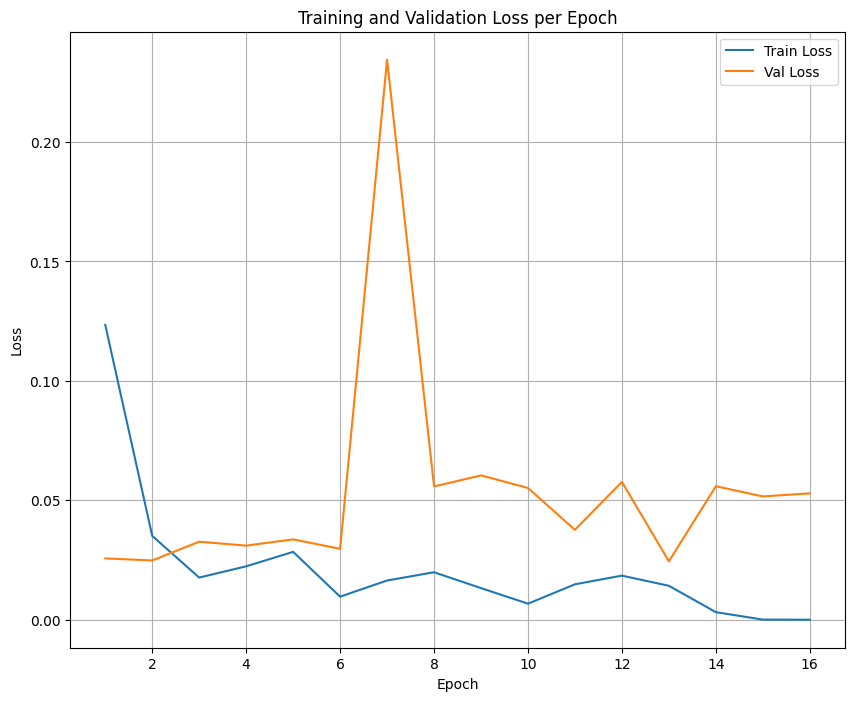

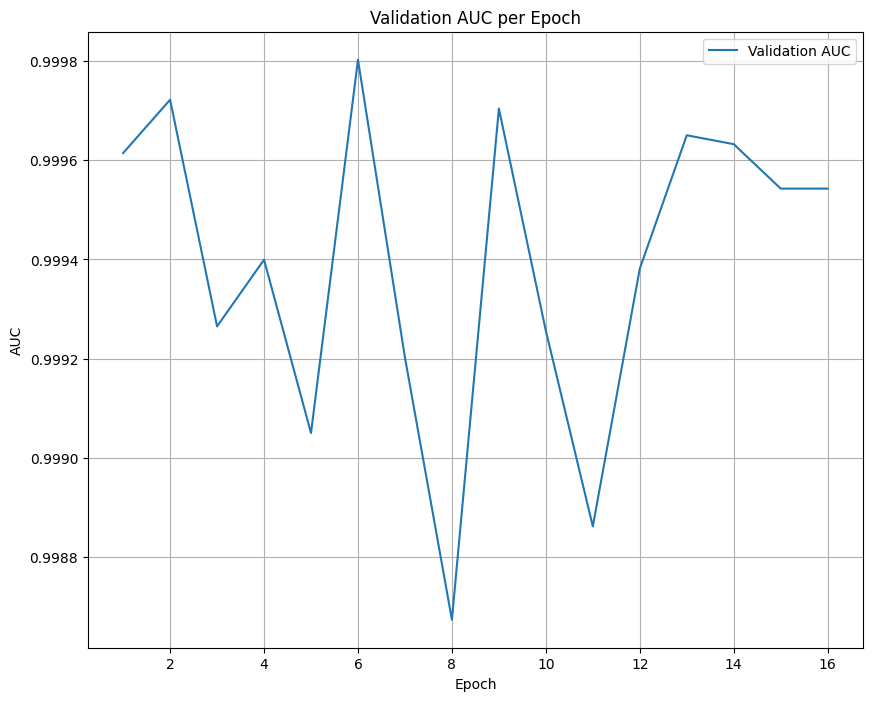

In [ ]:

plt.figure(figsize=(10, 8))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss")
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Val Loss")
plt.title("Training and Validation Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(10, 8))
plt.plot(range(1, len(val_aucs) + 1), val_aucs, label="Validation AUC")
plt.title("Validation AUC per Epoch")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()
plt.grid()
plt.show()

In [ ]:

test_running_loss = 0.0
all_labels = []
all_probs = []


model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)
        test_running_loss += loss.item() * images.size(0)


        probs = torch.sigmoid(outputs).cpu().numpy()
        all_probs.extend(probs)
        all_labels.extend(labels.cpu().numpy())


test_loss = test_running_loss / len(test_loader.dataset)


all_probs_np = np.array(all_probs)
test_auc = roc_auc_score(all_labels, all_probs_np[:, 1])


predicted_labels = np.argmax(all_probs_np, axis=1)
precision, recall, f1_score, _ = precision_recall_fscore_support(all_labels, predicted_labels, average='binary')
cm = confusion_matrix(all_labels, predicted_labels)


print(f'Test Loss: {test_loss:.4f}')
print(f'Test AUC: {test_auc:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')
print(f'Confusion Matrix: {cm}')

Test Loss: 0.1178
Test AUC: 0.9980
Precision: 0.9337
Recall: 0.9748
F1 Score: 0.9538
Confusion Matrix: [[695  11]
 [  4 155]]


After testing different weight adjustments (1.2, 1.4, 1.5), I found that none surpassed the performance of 1.3, indicating that this approach has reached its limit. Next, I plan to shift towards Focal Loss to further optimize the model’s performance.

The new approach focuses on ensuring all difficult samples (FN and FP) are detected while minimizing the misclassification of non-difficult samples as difficult ones. My strategy is to increase the model’s attention to hard-to-classify samples, reducing false negatives (FN) while also minimizing false positives (FP).

Next I'll first test Focal Loss with alpha=1.3 and gamma=2.0 to observe its effect on FN and FP. If further refinement is needed, I'll introduce the hybrid loss function to stabilize and optimize the model's performance.








# **ViT MOdel 4**
To avoid continuing with the results from the previous ResNet152 Model 4, the session needs to be restarted, and the execution should begin again from the data loading step.

In [ ]:
class FocalLoss(nn.Module):
  def __init__(self, alpha=1.3, gamma=2.0, reduction='mean'):
    super(FocalLoss, self).__init__()
    self.alpha = alpha
    self.gamma = gamma
    self.reduction = reduction

  def forward(self, inputs, targets):

    targets = F.one_hot(targets, num_classes=inputs.size(1)).float()


    BCE_loss = F.cross_entropy(inputs, targets, reduction='none')
    pt = torch.exp(-BCE_loss)
    F_loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss

    if self.reduction == 'mean':
        return torch.mean(F_loss)
    elif self.reduction == 'sum':
        return torch.sum(F_loss)
    else:
        return F_loss



In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model = models.vit_b_16(pretrained=True)


num_ftrs = model.heads.head.in_features
model.heads.head = nn.Linear(num_ftrs, 2)


model = model.to(device)

criterion = FocalLoss(alpha=1.3, gamma=2.0)

optimizer = optim.Adam(model.parameters(), lr=0.0001)
early_stopping = EarlyStopping(patience=15, min_delta=0.001)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
num_epochs = 300
train_losses = []
val_losses = []
val_aucs = []

for epoch in range(num_epochs):
  model.train()
  running_loss = 0.0
  for images, labels in train_loader:
    images = images.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item() * images.size(0)


  epoch_train_loss = running_loss / len(train_loader.dataset)
  train_losses.append(epoch_train_loss)

  model.eval()
  all_labels = []
  all_preds = []
  val_running_loss = 0.0
  with torch.no_grad():
    for val_images, val_labels in val_loader:
      val_images = val_images.to(device)
      val_labels = val_labels.to(device)
      val_outputs = model(val_images)
      val_loss = criterion(val_outputs, val_labels)
      val_running_loss += val_loss.item() * val_images.size(0)
      preds = torch.softmax(val_outputs, dim=1)[:, 1].cpu().numpy()
      all_preds.extend(preds)
      all_labels.extend(val_labels.cpu().numpy())

  epoch_val_loss = val_running_loss / len(val_loader.dataset)
  val_losses.append(epoch_val_loss)
  val_auc = roc_auc_score(all_labels, all_preds)
  val_aucs.append(val_auc)
  print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}, Val AUC: {val_auc:.4f}")

  early_stopping(val_auc)
  if early_stopping.early_stop:
    print("Early stopping triggered.")
    break

Epoch [1/300], Train Loss: 0.1808, Val Loss: 0.2628, Val AUC: 0.9933
Epoch [2/300], Train Loss: 0.0313, Val Loss: 0.0118, Val AUC: 0.9986
Epoch [3/300], Train Loss: 0.0135, Val Loss: 0.0081, Val AUC: 0.9996
Epoch [4/300], Train Loss: 0.0052, Val Loss: 0.0089, Val AUC: 0.9997
Epoch [5/300], Train Loss: 0.0084, Val Loss: 0.0324, Val AUC: 0.9994
Epoch [6/300], Train Loss: 0.0044, Val Loss: 0.0572, Val AUC: 0.9990
Epoch [7/300], Train Loss: 0.0069, Val Loss: 0.0188, Val AUC: 0.9990
Epoch [8/300], Train Loss: 0.0060, Val Loss: 0.0151, Val AUC: 0.9998
Epoch [9/300], Train Loss: 0.0017, Val Loss: 0.0138, Val AUC: 0.9996
Epoch [10/300], Train Loss: 0.0000, Val Loss: 0.0171, Val AUC: 0.9995
Epoch [11/300], Train Loss: 0.0000, Val Loss: 0.0176, Val AUC: 0.9995
Epoch [12/300], Train Loss: 0.0000, Val Loss: 0.0180, Val AUC: 0.9995
Epoch [13/300], Train Loss: 0.0000, Val Loss: 0.0184, Val AUC: 0.9995
Epoch [14/300], Train Loss: 0.0000, Val Loss: 0.0187, Val AUC: 0.9995
Epoch [15/300], Train Loss: 0

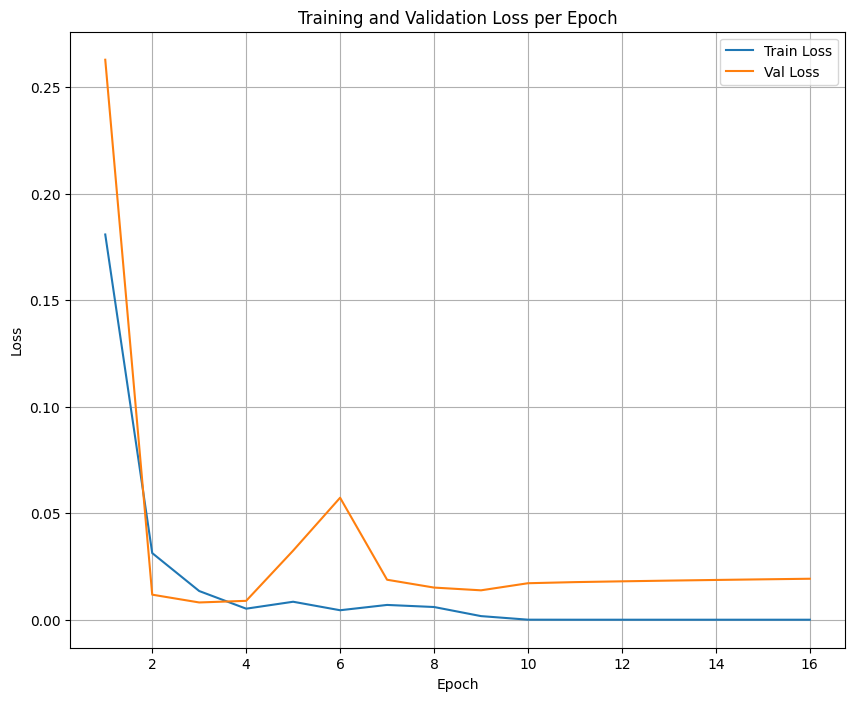

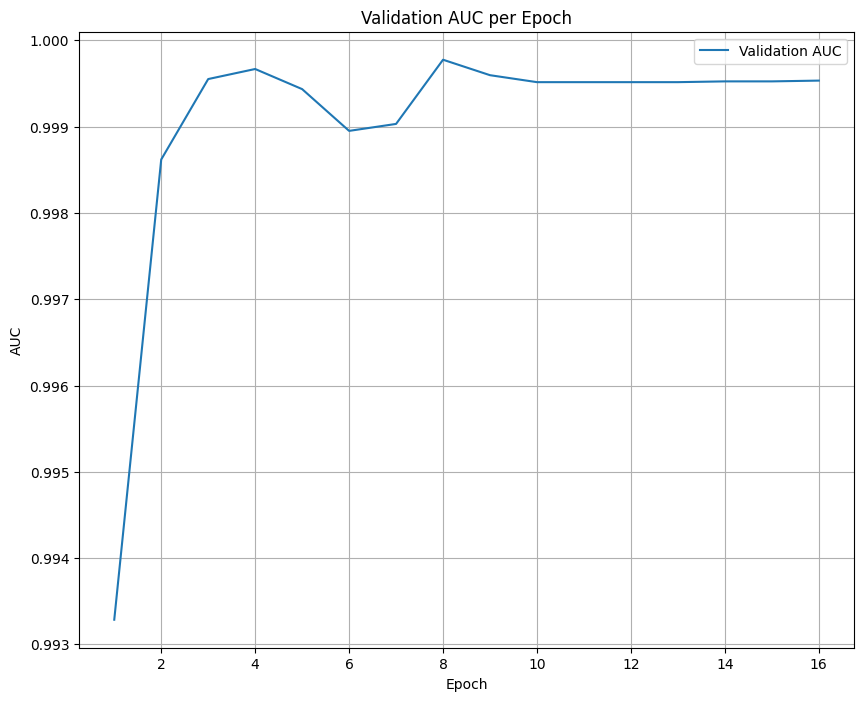

In [ ]:

plt.figure(figsize=(10, 8))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss")
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Val Loss")
plt.title("Training and Validation Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(10, 8))
plt.plot(range(1, len(val_aucs) + 1), val_aucs, label="Validation AUC")
plt.title("Validation AUC per Epoch")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()
plt.grid()
plt.show()

In [ ]:

test_running_loss = 0.0
all_labels = []
all_probs = []


model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)
        test_running_loss += loss.item() * images.size(0)


        probs = torch.sigmoid(outputs).cpu().numpy()
        all_probs.extend(probs)
        all_labels.extend(labels.cpu().numpy())


test_loss = test_running_loss / len(test_loader.dataset)


all_probs_np = np.array(all_probs)
test_auc = roc_auc_score(all_labels, all_probs_np[:, 1])


predicted_labels = np.argmax(all_probs_np, axis=1)
precision, recall, f1_score, _ = precision_recall_fscore_support(all_labels, predicted_labels, average='binary')
cm = confusion_matrix(all_labels, predicted_labels)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test AUC: {test_auc:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')
print(f'Confusion Matrix: {cm}')

Test Loss: 0.0615
Test AUC: 0.9973
Precision: 0.9286
Recall: 0.9811
F1 Score: 0.9541
Confusion Matrix: [[694  12]
 [  3 156]]


After applying Focal Loss, the model's performance improved significantly, with Test Loss dropping from 0.1178 to 0.0439, along with improvements in AUC, Precision, Recall, and F1 Score. This indicates that the current strategy is effective. The next focus is to further reduce false positives (FP) and false negatives (FN), optimizing the model's handling of difficult samples.

So next I will:

1.   Keep alpha at 1.3: The current parameter has effectively balanced the class weights, and the Recall is performing well. Therefore, no further adjustment is needed for alpha.
2.   Gradually adjust gamma: First, set gamma to 2.5 and observe the impact on FP and FN, especially on hard-to-classify samples. If the results are not satisfactory, increase gamma to 3 to intensify focus on difficult samples. If performance still doesn't meet expectations, lower gamma to 1.5 to find the optimal balance between reducing FP and maintaining high Recall.




# **ViT Model 5**
To avoid continuing with the results from the previous ResNet152 Model 4, the session needs to be restarted, and the execution should begin again from the data loading step.

In [ ]:
class FocalLoss(nn.Module):
  def __init__(self, alpha=1.3, gamma=2.5, reduction='mean'):
    super(FocalLoss, self).__init__()
    self.alpha = alpha
    self.gamma = gamma
    self.reduction = reduction

  def forward(self, inputs, targets):

    targets = F.one_hot(targets, num_classes=inputs.size(1)).float()


    BCE_loss = F.cross_entropy(inputs, targets, reduction='none')
    pt = torch.exp(-BCE_loss)
    F_loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss

    if self.reduction == 'mean':
        return torch.mean(F_loss)
    elif self.reduction == 'sum':
        return torch.sum(F_loss)
    else:
        return F_loss


In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model = models.vit_b_16(pretrained=True)

num_ftrs = model.heads.head.in_features
model.heads.head = nn.Linear(num_ftrs, 2)

model = model.to(device)

criterion = FocalLoss(alpha=1.3, gamma=2.5)

optimizer = optim.Adam(model.parameters(), lr=0.0001)
early_stopping = EarlyStopping(patience=15, min_delta=0.001)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
num_epochs = 300
train_losses = []
val_losses = []
val_aucs = []

for epoch in range(num_epochs):
  model.train()
  running_loss = 0.0
  for images, labels in train_loader:
    images = images.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item() * images.size(0)


  epoch_train_loss = running_loss / len(train_loader.dataset)
  train_losses.append(epoch_train_loss)

  model.eval()
  all_labels = []
  all_preds = []
  val_running_loss = 0.0
  with torch.no_grad():
    for val_images, val_labels in val_loader:
      val_images = val_images.to(device)
      val_labels = val_labels.to(device)
      val_outputs = model(val_images)
      val_loss = criterion(val_outputs, val_labels)
      val_running_loss += val_loss.item() * val_images.size(0)
      preds = torch.softmax(val_outputs, dim=1)[:, 1].cpu().numpy()
      all_preds.extend(preds)
      all_labels.extend(val_labels.cpu().numpy())

  epoch_val_loss = val_running_loss / len(val_loader.dataset)
  val_losses.append(epoch_val_loss)
  val_auc = roc_auc_score(all_labels, all_preds)
  val_aucs.append(val_auc)
  print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}, Val AUC: {val_auc:.4f}")

  early_stopping(val_auc)
  if early_stopping.early_stop:
    print("Early stopping triggered.")
    break

Epoch [1/300], Train Loss: 0.0920, Val Loss: 0.0137, Val AUC: 0.9981
Epoch [2/300], Train Loss: 0.0170, Val Loss: 0.0086, Val AUC: 0.9994
Epoch [3/300], Train Loss: 0.0102, Val Loss: 0.0174, Val AUC: 0.9971
Epoch [4/300], Train Loss: 0.0102, Val Loss: 0.0100, Val AUC: 0.9988
Epoch [5/300], Train Loss: 0.0095, Val Loss: 0.0127, Val AUC: 0.9996
Epoch [6/300], Train Loss: 0.0027, Val Loss: 0.0296, Val AUC: 0.9990
Epoch [7/300], Train Loss: 0.0065, Val Loss: 0.0147, Val AUC: 0.9983
Epoch [8/300], Train Loss: 0.0031, Val Loss: 0.0150, Val AUC: 0.9997
Epoch [9/300], Train Loss: 0.0069, Val Loss: 0.0076, Val AUC: 0.9993
Epoch [10/300], Train Loss: 0.0039, Val Loss: 0.0327, Val AUC: 0.9997
Epoch [11/300], Train Loss: 0.0035, Val Loss: 0.0106, Val AUC: 0.9997
Epoch [12/300], Train Loss: 0.0147, Val Loss: 0.0579, Val AUC: 0.9985
Epoch [13/300], Train Loss: 0.0053, Val Loss: 0.0284, Val AUC: 0.9988
Epoch [14/300], Train Loss: 0.0010, Val Loss: 0.0156, Val AUC: 0.9989
Epoch [15/300], Train Loss: 0

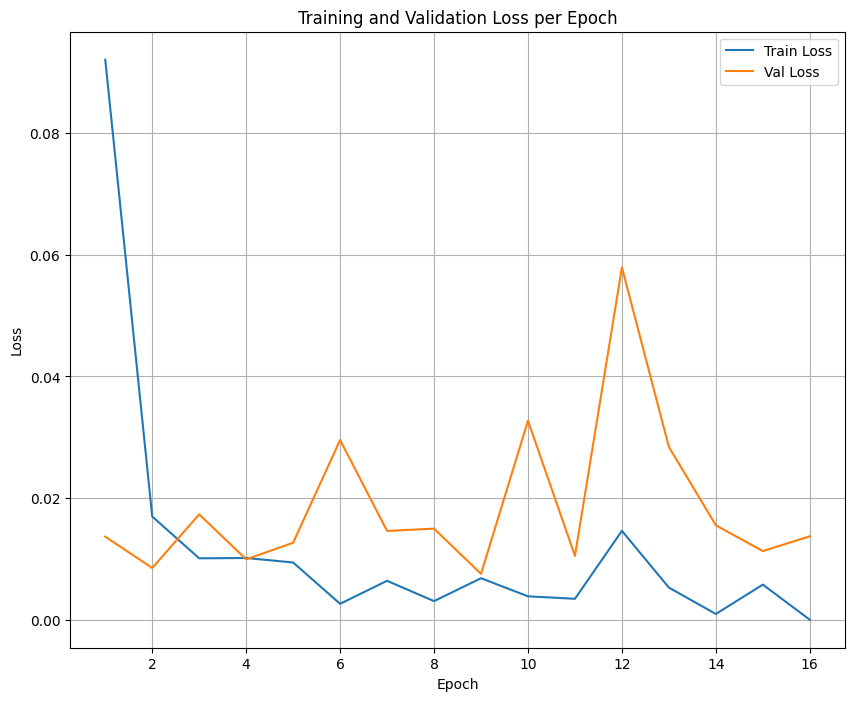

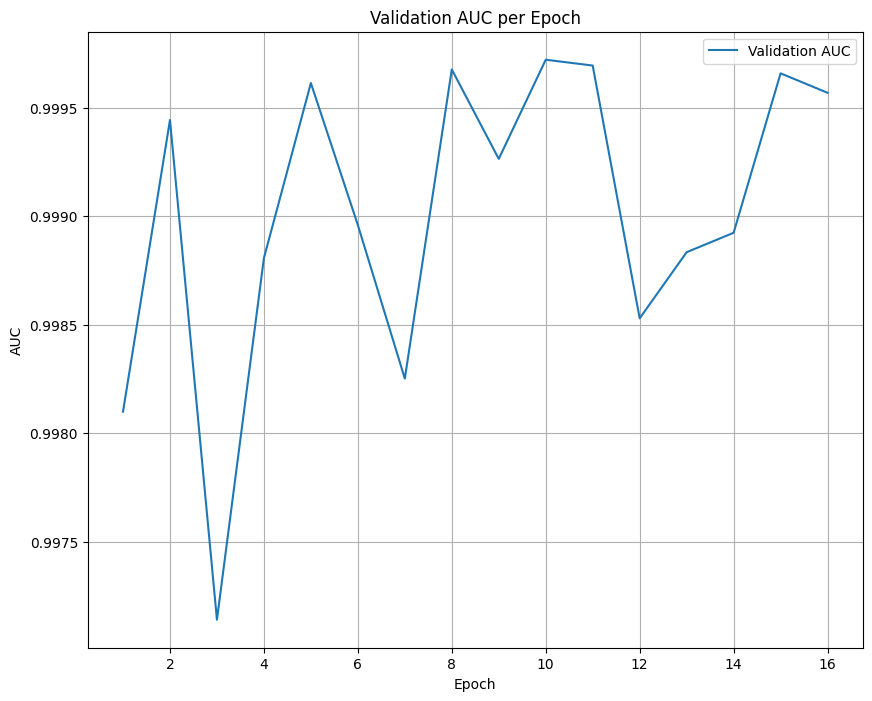

In [ ]:

plt.figure(figsize=(10, 8))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss")
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Val Loss")
plt.title("Training and Validation Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(10, 8))
plt.plot(range(1, len(val_aucs) + 1), val_aucs, label="Validation AUC")
plt.title("Validation AUC per Epoch")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()
plt.grid()
plt.show()

In [ ]:

test_running_loss = 0.0
all_labels = []
all_probs = []


model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)
        test_running_loss += loss.item() * images.size(0)


        probs = torch.sigmoid(outputs).cpu().numpy()
        all_probs.extend(probs)
        all_labels.extend(labels.cpu().numpy())


test_loss = test_running_loss / len(test_loader.dataset)


all_probs_np = np.array(all_probs)
test_auc = roc_auc_score(all_labels, all_probs_np[:, 1])


predicted_labels = np.argmax(all_probs_np, axis=1)
precision, recall, f1_score, _ = precision_recall_fscore_support(all_labels, predicted_labels, average='binary')
cm = confusion_matrix(all_labels, predicted_labels)


print(f'Test Loss: {test_loss:.4f}')
print(f'Test AUC: {test_auc:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')
print(f'Confusion Matrix: {cm}')

Test Loss: 0.0446
Test AUC: 0.9974
Precision: 0.9337
Recall: 0.9748
F1 Score: 0.9538
Confusion Matrix: [[695  11]
 [  4 155]]


# **ViT Model 6**
To avoid continuing with the results from the previous ResNet152 Model 4, the session needs to be restarted, and the execution should begin again from the data loading step.

In [ ]:
class FocalLoss(nn.Module):
  def __init__(self, alpha=1.3, gamma=3, reduction='mean'):
    super(FocalLoss, self).__init__()
    self.alpha = alpha
    self.gamma = gamma
    self.reduction = reduction

  def forward(self, inputs, targets):

    targets = F.one_hot(targets, num_classes=inputs.size(1)).float()


    BCE_loss = F.cross_entropy(inputs, targets, reduction='none')
    pt = torch.exp(-BCE_loss)
    F_loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss

    if self.reduction == 'mean':
        return torch.mean(F_loss)
    elif self.reduction == 'sum':
        return torch.sum(F_loss)
    else:
        return F_loss

In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model = models.vit_b_16(pretrained=True)


num_ftrs = model.heads.head.in_features
model.heads.head = nn.Linear(num_ftrs, 2)


model = model.to(device)

criterion = FocalLoss(alpha=1.3, gamma=3)

optimizer = optim.Adam(model.parameters(), lr=0.0001)
early_stopping = EarlyStopping(patience=15, min_delta=0.001)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/vit_b_16-c867db91.pth" to /root/.cache/torch/hub/checkpoints/vit_b_16-c867db91.pth
100%|██████████| 330M/330M [00:01<00:00, 186MB/s]


In [ ]:
num_epochs = 300
train_losses = []
val_losses = []
val_aucs = []

for epoch in range(num_epochs):
  model.train()
  running_loss = 0.0
  for images, labels in train_loader:
    images = images.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item() * images.size(0)


  epoch_train_loss = running_loss / len(train_loader.dataset)
  train_losses.append(epoch_train_loss)

  model.eval()
  all_labels = []
  all_preds = []
  val_running_loss = 0.0
  with torch.no_grad():
    for val_images, val_labels in val_loader:
      val_images = val_images.to(device)
      val_labels = val_labels.to(device)
      val_outputs = model(val_images)
      val_loss = criterion(val_outputs, val_labels)
      val_running_loss += val_loss.item() * val_images.size(0)
      preds = torch.softmax(val_outputs, dim=1)[:, 1].cpu().numpy()
      all_preds.extend(preds)
      all_labels.extend(val_labels.cpu().numpy())

  epoch_val_loss = val_running_loss / len(val_loader.dataset)
  val_losses.append(epoch_val_loss)
  val_auc = roc_auc_score(all_labels, all_preds)
  val_aucs.append(val_auc)
  print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}, Val AUC: {val_auc:.4f}")

  early_stopping(val_auc)
  if early_stopping.early_stop:
    print("Early stopping triggered.")
    break

Epoch [1/300], Train Loss: 0.0880, Val Loss: 0.0252, Val AUC: 0.9948
Epoch [2/300], Train Loss: 0.0167, Val Loss: 0.0131, Val AUC: 0.9986
Epoch [3/300], Train Loss: 0.0073, Val Loss: 0.0098, Val AUC: 0.9976
Epoch [4/300], Train Loss: 0.0104, Val Loss: 0.0081, Val AUC: 0.9992
Epoch [5/300], Train Loss: 0.0054, Val Loss: 0.0089, Val AUC: 0.9995
Epoch [6/300], Train Loss: 0.0043, Val Loss: 0.0102, Val AUC: 0.9994
Epoch [7/300], Train Loss: 0.0035, Val Loss: 0.0055, Val AUC: 0.9996
Epoch [8/300], Train Loss: 0.0018, Val Loss: 0.0165, Val AUC: 0.9997
Epoch [9/300], Train Loss: 0.0000, Val Loss: 0.0080, Val AUC: 0.9997
Epoch [10/300], Train Loss: 0.0000, Val Loss: 0.0086, Val AUC: 0.9997
Epoch [11/300], Train Loss: 0.0000, Val Loss: 0.0088, Val AUC: 0.9997
Epoch [12/300], Train Loss: 0.0000, Val Loss: 0.0090, Val AUC: 0.9997
Epoch [13/300], Train Loss: 0.0000, Val Loss: 0.0091, Val AUC: 0.9997
Epoch [14/300], Train Loss: 0.0000, Val Loss: 0.0092, Val AUC: 0.9997
Epoch [15/300], Train Loss: 0

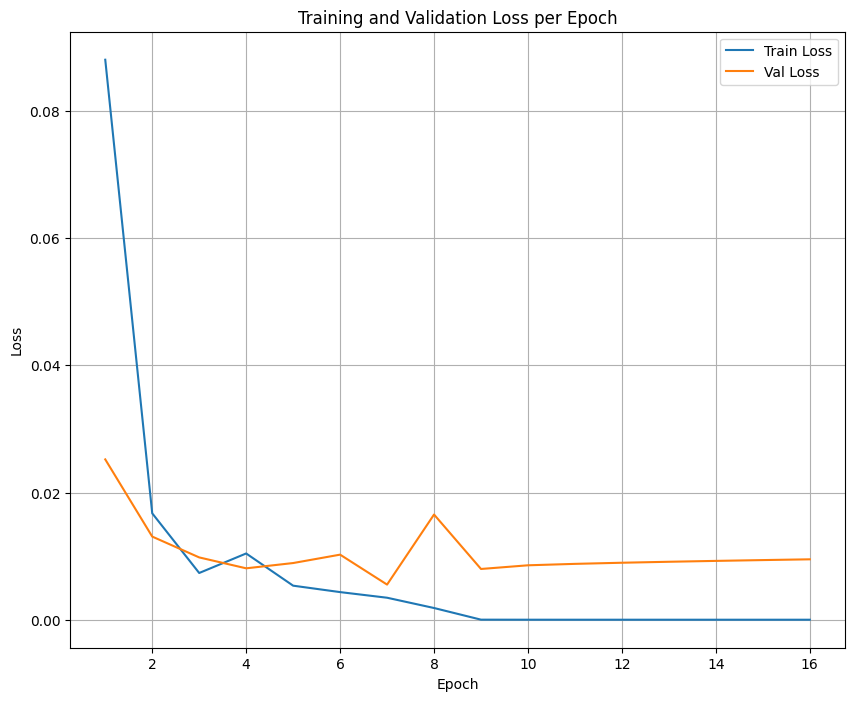

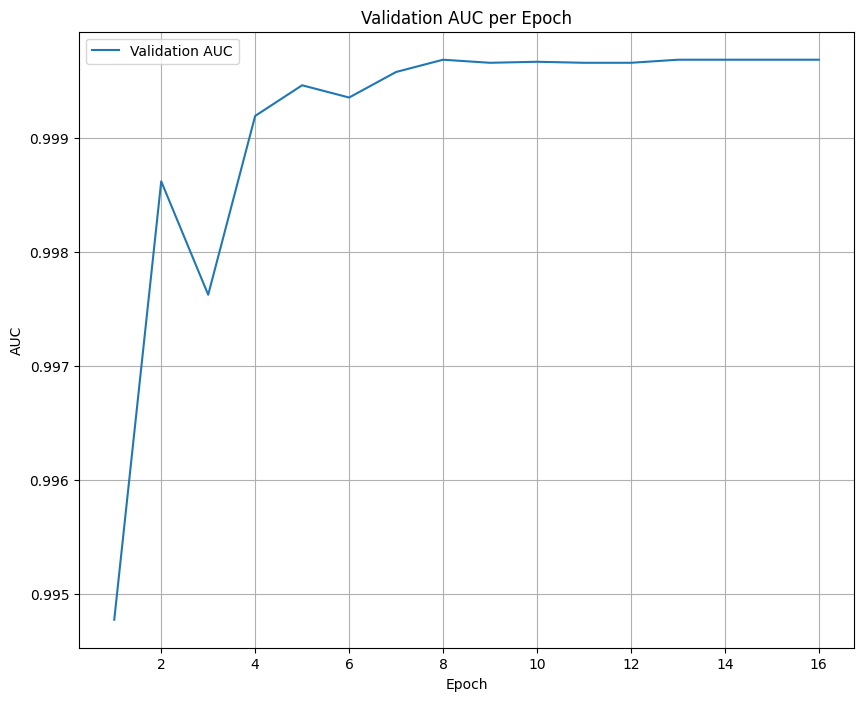

In [ ]:

plt.figure(figsize=(10, 8))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss")
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Val Loss")
plt.title("Training and Validation Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(10, 8))
plt.plot(range(1, len(val_aucs) + 1), val_aucs, label="Validation AUC")
plt.title("Validation AUC per Epoch")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()
plt.grid()
plt.show()

In [ ]:

test_running_loss = 0.0
all_labels = []
all_probs = []

model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)
        test_running_loss += loss.item() * images.size(0)


        probs = torch.sigmoid(outputs).cpu().numpy()
        all_probs.extend(probs)
        all_labels.extend(labels.cpu().numpy())


test_loss = test_running_loss / len(test_loader.dataset)


all_probs_np = np.array(all_probs)
test_auc = roc_auc_score(all_labels, all_probs_np[:, 1])


predicted_labels = np.argmax(all_probs_np, axis=1)
precision, recall, f1_score, _ = precision_recall_fscore_support(all_labels, predicted_labels, average='binary')
cm = confusion_matrix(all_labels, predicted_labels)


print(f'Test Loss: {test_loss:.4f}')
print(f'Test AUC: {test_auc:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')
print(f'Confusion Matrix: {cm}')

Test Loss: 0.0401
Test AUC: 0.9979
Precision: 0.9448
Recall: 0.9686
F1 Score: 0.9565
Confusion Matrix: [[697   9]
 [  5 154]]


It is evident that setting gamma to 2.5 and 3 did not optimize the results. Next, I will try adjusting gamma to 1.5 to see if it improves the model's performance.








# **ViT Model 7**
To avoid continuing with the results from the previous ResNet152 Model 4, the session needs to be restarted, and the execution should begin again from the data loading step.

In [ ]:
class FocalLoss(nn.Module):
  def __init__(self, alpha=1.3, gamma=1.5, reduction='mean'):
    super(FocalLoss, self).__init__()
    self.alpha = alpha
    self.gamma = gamma
    self.reduction = reduction

  def forward(self, inputs, targets):

    targets = F.one_hot(targets, num_classes=inputs.size(1)).float()


    BCE_loss = F.cross_entropy(inputs, targets, reduction='none')
    pt = torch.exp(-BCE_loss)
    F_loss = self.alpha * (1 - pt) ** self.gamma * BCE_loss

    if self.reduction == 'mean':
        return torch.mean(F_loss)
    elif self.reduction == 'sum':
        return torch.sum(F_loss)
    else:
        return F_loss

In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model = models.vit_b_16(pretrained=True)


num_ftrs = model.heads.head.in_features
model.heads.head = nn.Linear(num_ftrs, 2)


model = model.to(device)

criterion = FocalLoss(alpha=1.3, gamma=1.5)

optimizer = optim.Adam(model.parameters(), lr=0.0001)
early_stopping = EarlyStopping(patience=15, min_delta=0.001)

/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
num_epochs = 300
train_losses = []
val_losses = []
val_aucs = []

for epoch in range(num_epochs):
  model.train()
  running_loss = 0.0
  for images, labels in train_loader:
    images = images.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item() * images.size(0)


  epoch_train_loss = running_loss / len(train_loader.dataset)
  train_losses.append(epoch_train_loss)

  model.eval()
  all_labels = []
  all_preds = []
  val_running_loss = 0.0
  with torch.no_grad():
    for val_images, val_labels in val_loader:
      val_images = val_images.to(device)
      val_labels = val_labels.to(device)
      val_outputs = model(val_images)
      val_loss = criterion(val_outputs, val_labels)
      val_running_loss += val_loss.item() * val_images.size(0)
      preds = torch.softmax(val_outputs, dim=1)[:, 1].cpu().numpy()
      all_preds.extend(preds)
      all_labels.extend(val_labels.cpu().numpy())

  epoch_val_loss = val_running_loss / len(val_loader.dataset)
  val_losses.append(epoch_val_loss)
  val_auc = roc_auc_score(all_labels, all_preds)
  val_aucs.append(val_auc)
  print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}, Val AUC: {val_auc:.4f}")

  early_stopping(val_auc)
  if early_stopping.early_stop:
    print("Early stopping triggered.")
    break

Epoch [1/300], Train Loss: 0.0803, Val Loss: 0.0063, Val AUC: 0.9998
Epoch [2/300], Train Loss: 0.0190, Val Loss: 0.0301, Val AUC: 0.9997
Epoch [3/300], Train Loss: 0.0115, Val Loss: 0.0098, Val AUC: 0.9997
Epoch [4/300], Train Loss: 0.0161, Val Loss: 0.0239, Val AUC: 0.9998
Epoch [5/300], Train Loss: 0.0102, Val Loss: 0.0312, Val AUC: 0.9998
Epoch [6/300], Train Loss: 0.0077, Val Loss: 0.0104, Val AUC: 0.9998
Epoch [7/300], Train Loss: 0.0062, Val Loss: 0.0128, Val AUC: 0.9996
Epoch [8/300], Train Loss: 0.0079, Val Loss: 0.0089, Val AUC: 0.9999
Epoch [9/300], Train Loss: 0.0074, Val Loss: 0.1457, Val AUC: 0.9993
Epoch [10/300], Train Loss: 0.0046, Val Loss: 0.0119, Val AUC: 0.9999
Epoch [11/300], Train Loss: 0.0054, Val Loss: 0.0242, Val AUC: 0.9995
Epoch [12/300], Train Loss: 0.0032, Val Loss: 0.0265, Val AUC: 0.9999
Epoch [13/300], Train Loss: 0.0001, Val Loss: 0.0265, Val AUC: 1.0000
Epoch [14/300], Train Loss: 0.0000, Val Loss: 0.0240, Val AUC: 0.9999
Epoch [15/300], Train Loss: 0

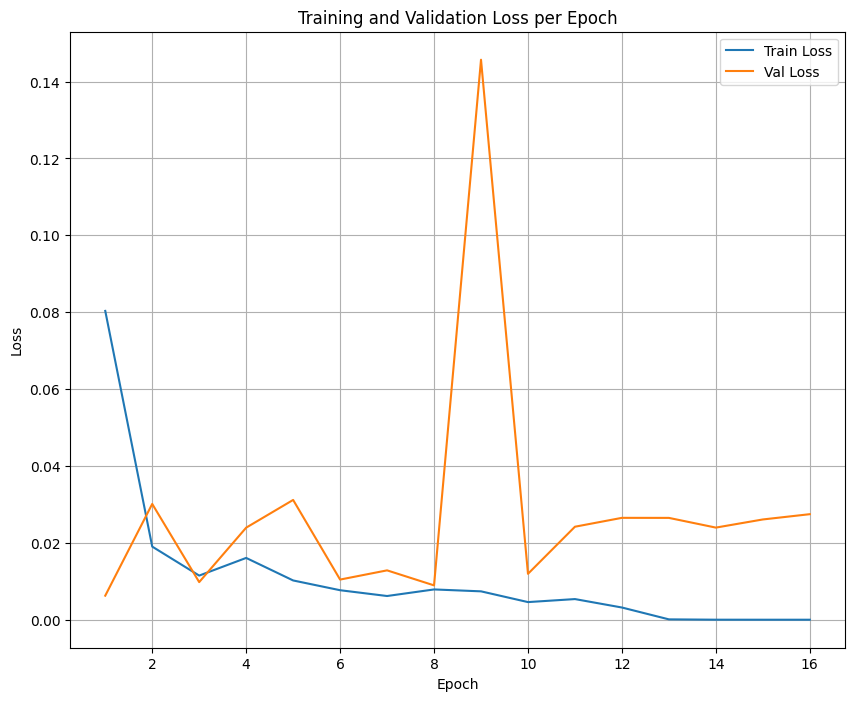

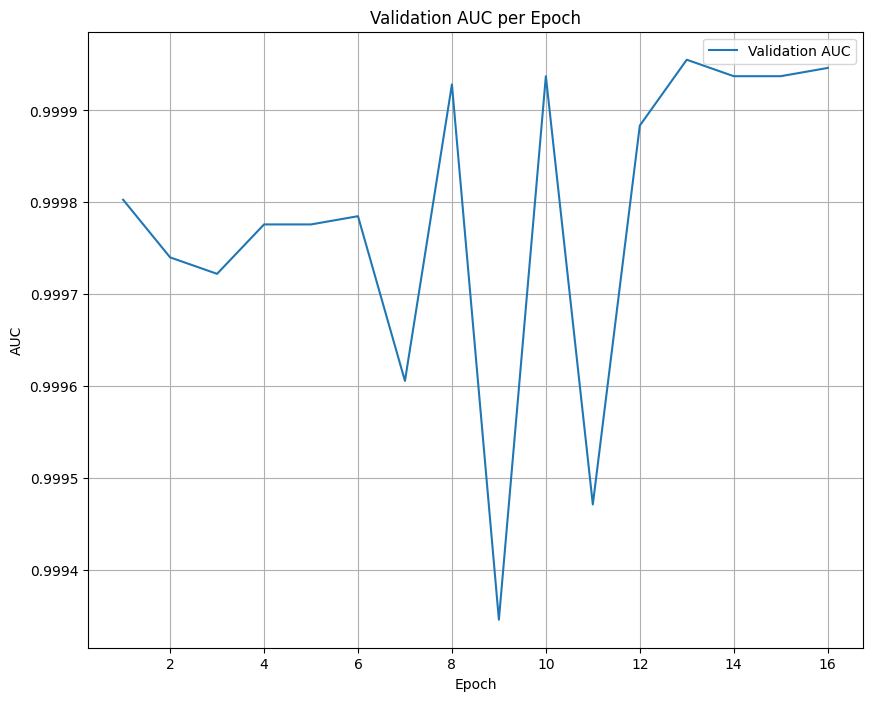

In [ ]:

plt.figure(figsize=(10, 8))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss")
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Val Loss")
plt.title("Training and Validation Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(10, 8))
plt.plot(range(1, len(val_aucs) + 1), val_aucs, label="Validation AUC")
plt.title("Validation AUC per Epoch")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()
plt.grid()
plt.show()

In [ ]:

test_running_loss = 0.0
all_labels = []
all_probs = []


model.eval()
with torch.no_grad():
    for images, labels in test_loader:
        images = images.to(device)
        labels = labels.to(device)

        outputs = model(images)
        loss = criterion(outputs, labels)
        test_running_loss += loss.item() * images.size(0)


        probs = torch.sigmoid(outputs).cpu().numpy()
        all_probs.extend(probs)
        all_labels.extend(labels.cpu().numpy())


test_loss = test_running_loss / len(test_loader.dataset)


all_probs_np = np.array(all_probs)
test_auc = roc_auc_score(all_labels, all_probs_np[:, 1])


predicted_labels = np.argmax(all_probs_np, axis=1)
precision, recall, f1_score, _ = precision_recall_fscore_support(all_labels, predicted_labels, average='binary')
cm = confusion_matrix(all_labels, predicted_labels)

print(f'Test Loss: {test_loss:.4f}')
print(f'Test AUC: {test_auc:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 Score: {f1_score:.4f}')
print(f'Confusion Matrix: {cm}')

Test Loss: 0.0520
Test AUC: 0.9986
Precision: 0.9235
Recall: 0.9874
F1 Score: 0.9544
Confusion Matrix: [[693  13]
 [  2 157]]




1.   gamma=2.5 result：

*   Test Loss: 0.0446
*   Test AUC: 0.9974
*   Precision: 0.9337
*   Recall: 0.9748
*   F1 Score: 0.9538
*   Confusion Matrix:
            [[695  11]
            [ 4  155]]
2.   gamma=3 result：
*   Test Loss: 0.0401
*   Test AUC: 0.9979
*   Precision: 0.9448
*   Recall: 0.9686
*   F1 Score: 0.9565
*   Confusion Matrix:
           [[697   9]
           [ 5  154]]

3   gamma=1.5 result：
*   Test Loss: 0.0520
*   Test AUC: 0.9986
*   Precision: 0.9235
*   Recall: 0.9874
*   F1 Score: 0.9544
*   Confusion Matrix:
            [[693  13]
            [ 2  157]]

Looking at the F1 Score and Confusion Matrix, it's clear that reducing FN and FP simultaneously is not possible: decreasing FN increases FP, and reducing FP leads to more FN. This highlights the trade-off between Precision and Recall. When you focus on reducing FP, FN tends to rise, and improving Recall by lowering FN generally increases FP. This also suggests that the model's predicted probabilities are informative, but the default threshold of 0.5 may not be the optimal balance point.

A new approach would be to adjust the classification threshold to find a better balance. The threshold directly impacts the criteria by which the model classifies samples as positive or negative. By tuning it, we can potentially strike a balance between Precision and Recall, and possibly reduce both FN and FP. The next step is to calculate Precision, Recall, and F1 Score across different thresholds and identify the one that maximizes the F1 Score for optimal model performance.










# **ViT Model 8**
To avoid continuing with the results from the previous ResNet152 Model 4, the session needs to be restarted, and the execution should begin again from the data loading step.

In [ ]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


model = models.vit_b_16(pretrained=True)


num_ftrs = model.heads.head.in_features
model.heads.head = nn.Linear(num_ftrs, 2)


model = model.to(device)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)
early_stopping = EarlyStopping(patience=15, min_delta=0.001)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ViT_B_16_Weights.IMAGENET1K_V1`. You can also use `weights=ViT_B_16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [ ]:
num_epochs = 300
train_losses = []
val_losses = []
val_aucs = []

for epoch in range(num_epochs):
  model.train()
  running_loss = 0.0
  for images, labels in train_loader:
    images = images.to(device)
    labels = labels.to(device)
    optimizer.zero_grad()
    outputs = model(images)
    loss = criterion(outputs, labels)
    loss.backward()
    optimizer.step()
    running_loss += loss.item() * images.size(0)


  epoch_train_loss = running_loss / len(train_loader.dataset)
  train_losses.append(epoch_train_loss)

  model.eval()
  all_labels = []
  all_preds = []
  val_running_loss = 0.0
  with torch.no_grad():
      for val_images, val_labels in val_loader:
        val_images = val_images.to(device)
        val_labels = val_labels.to(device)
        val_outputs = model(val_images)
        val_loss = criterion(val_outputs, val_labels)
        val_running_loss += val_loss.item() * val_images.size(0)
        preds = torch.softmax(val_outputs, dim=1)[:, 1].cpu().numpy()
        all_preds.extend(preds)
        all_labels.extend(val_labels.cpu().numpy())

  epoch_val_loss = val_running_loss / len(val_loader.dataset)
  val_losses.append(epoch_val_loss)
  val_auc = roc_auc_score(all_labels, all_preds)
  val_aucs.append(val_auc)
  print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {epoch_train_loss:.4f}, Val Loss: {epoch_val_loss:.4f}, Val AUC: {val_auc:.4f}")

  early_stopping(val_auc)
  if early_stopping.early_stop:
    print("Early stopping triggered.")
    break

Epoch [1/300], Train Loss: 0.1347, Val Loss: 0.0147, Val AUC: 0.9998
Epoch [2/300], Train Loss: 0.0386, Val Loss: 0.0197, Val AUC: 0.9997
Epoch [3/300], Train Loss: 0.0202, Val Loss: 0.0765, Val AUC: 0.9996
Epoch [4/300], Train Loss: 0.0219, Val Loss: 0.0646, Val AUC: 0.9990
Epoch [5/300], Train Loss: 0.0317, Val Loss: 0.0357, Val AUC: 0.9993
Epoch [6/300], Train Loss: 0.0202, Val Loss: 0.0308, Val AUC: 0.9997
Epoch [7/300], Train Loss: 0.0069, Val Loss: 0.0998, Val AUC: 0.9990
Epoch [8/300], Train Loss: 0.0117, Val Loss: 0.0317, Val AUC: 0.9991
Epoch [9/300], Train Loss: 0.0189, Val Loss: 0.0891, Val AUC: 0.9985
Epoch [10/300], Train Loss: 0.0084, Val Loss: 0.0207, Val AUC: 0.9997
Epoch [11/300], Train Loss: 0.0003, Val Loss: 0.0542, Val AUC: 0.9995
Epoch [12/300], Train Loss: 0.0001, Val Loss: 0.0385, Val AUC: 0.9998
Epoch [13/300], Train Loss: 0.0000, Val Loss: 0.0416, Val AUC: 0.9998
Epoch [14/300], Train Loss: 0.0000, Val Loss: 0.0409, Val AUC: 0.9998
Epoch [15/300], Train Loss: 0

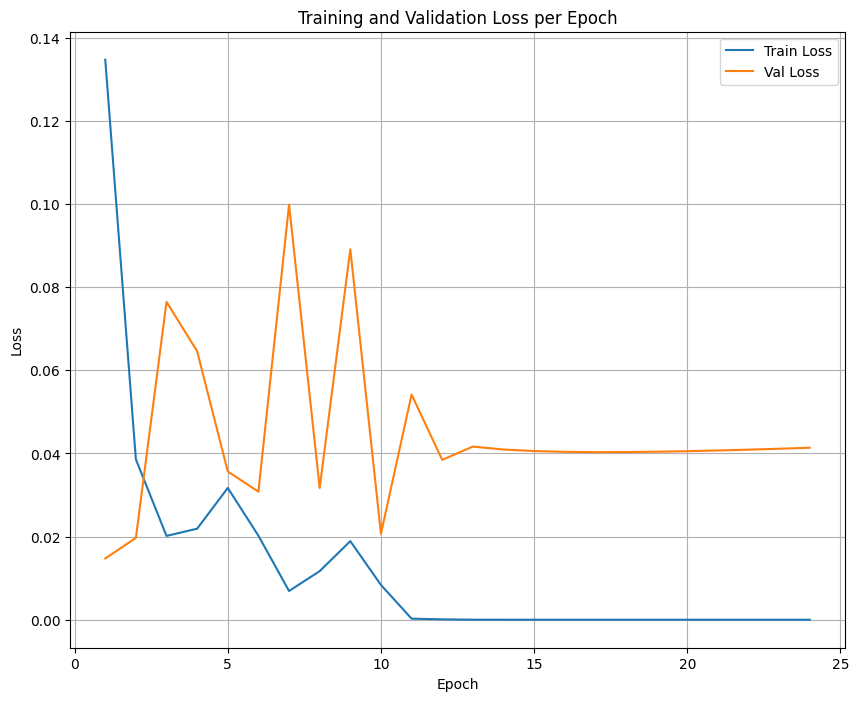

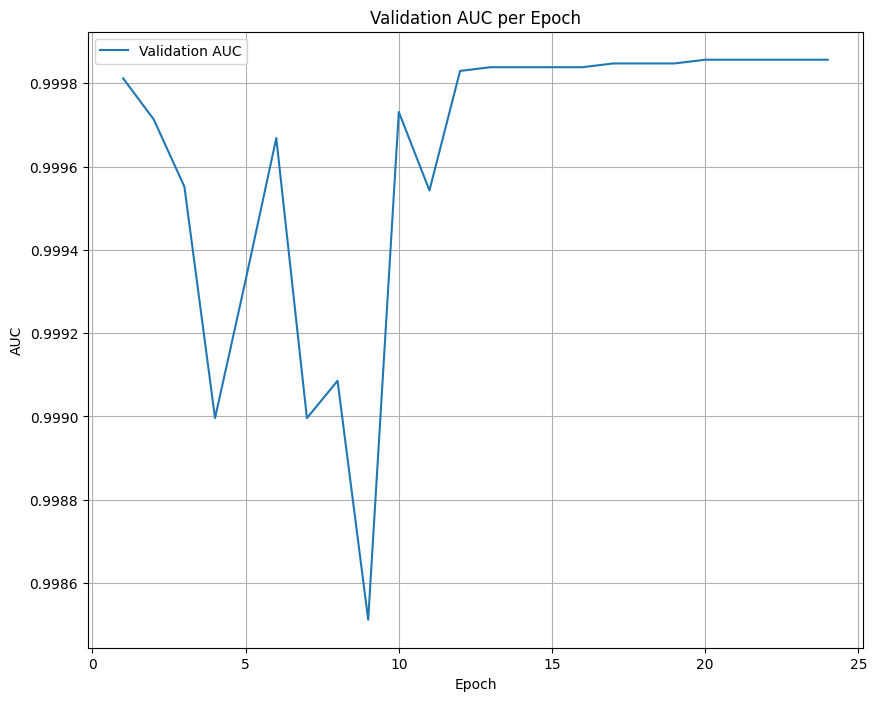

In [ ]:

plt.figure(figsize=(10, 8))
plt.plot(range(1, len(train_losses) + 1), train_losses, label="Train Loss")
plt.plot(range(1, len(val_losses) + 1), val_losses, label="Val Loss")
plt.title("Training and Validation Loss per Epoch")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(10, 8))
plt.plot(range(1, len(val_aucs) + 1), val_aucs, label="Validation AUC")
plt.title("Validation AUC per Epoch")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()
plt.grid()
plt.show()

Best threshold: 0.9988, corresponding F1 Score: 0.9592
Confusion Matrix:
[[699   7]
 [  6 153]]
Precision: 0.9563
Recall: 0.9623
F1 Score: 0.9592


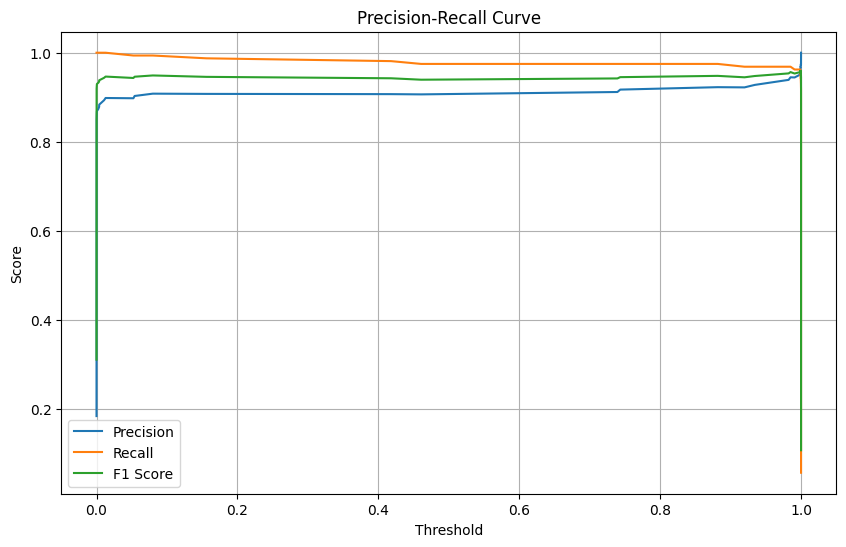

In [ ]:
from sklearn.metrics import precision_recall_curve, confusion_matrix, precision_recall_fscore_support, roc_auc_score


def evaluate_thresholds(model, test_loader, device):
    model.eval()
    all_labels = []
    all_probs = []

    with torch.no_grad():
        for images, labels in test_loader:
            images = images.to(device)
            outputs = model(images)
            probs = torch.softmax(outputs, dim=1)[:, 1].cpu().numpy()
            all_probs.extend(probs)
            all_labels.extend(labels.cpu().numpy())


    all_labels = np.array(all_labels)
    all_probs = np.array(all_probs)


    precisions, recalls, thresholds = precision_recall_curve(all_labels, all_probs)


    f1_scores = 2 * (precisions * recalls) / (precisions + recalls)


    best_threshold = thresholds[np.argmax(f1_scores)]
    best_f1 = np.max(f1_scores)


    predicted_labels = (all_probs >= best_threshold).astype(int)


    cm = confusion_matrix(all_labels, predicted_labels)
    precision, recall, f1_score, _ = precision_recall_fscore_support(all_labels, predicted_labels, average='binary')

    print(f"Best threshold: {best_threshold:.4f}, corresponding F1 Score: {best_f1:.4f}")
    print(f"Confusion Matrix:\n{cm}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1_score:.4f}")


    plt.figure(figsize=(10, 6))
    plt.plot(thresholds, precisions[:-1], label="Precision")
    plt.plot(thresholds, recalls[:-1], label="Recall")
    plt.plot(thresholds, f1_scores[:-1], label="F1 Score")
    plt.title("Precision-Recall Curve")
    plt.xlabel("Threshold")
    plt.ylabel("Score")
    plt.legend()
    plt.grid(True)
    plt.show()

    return best_threshold


best_threshold = evaluate_thresholds(model, test_loader, device)


Indeed, the current F1 Score of 0.9592 is the best performance among all the ViT models, but there remains a slight gap compared to ResNet152. However, it's noteworthy that ViT achieved an impressive F1 Score of 0.9437 without any parameter adjustments initially, indicating a strong baseline performance on this dataset. In contrast, ResNet152 only reached its best performance after fine-tuning. This suggests that ViT holds greater potential due to its superior ability to capture global image features, as its self-attention mechanism excels at recognizing intricate global dependencies.

That said, ViT still falls short in some areas, such as handling false positives or false negatives, likely due to its relatively weaker ability to capture local details. ResNet152, as a convolutional neural network, excels at capturing local features, while ViT processes images in patches, which might slightly limit its performance in fine-grained feature extraction.

This leads to the next logical step: if I want to combine the global modeling power of ViT with the local feature extraction strengths of convolutional networks, Swin Transformer would be a promising choice. Swin Transformer leverages a hierarchical structure to progressively aggregate local information while using self-attention to capture global features. This hybrid approach retains ViT's strong global feature handling and enhances local detail capture, potentially offering an even better performance on this dataset.